In [36]:
import numpy as np
import pandas as pd
%matplotlib inline

import matplotlib as mlt
import matplotlib.pyplot as plt

df = pd.read_csv('london_crime_by_lsoa.csv', nrows=1349060,dtype={'month': str,'year': str})
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
1349055,E01004005,Southwark,Theft and Handling,Theft/Taking of Pedal Cycle,2,2008,12
1349056,E01002201,Harrow,Robbery,Personal Property,0,2014,7
1349057,E01001586,Greenwich,Robbery,Personal Property,0,2011,3
1349058,E01033150,Enfield,Theft and Handling,Handling Stolen Goods,0,2013,2


In [37]:
from datetime import datetime, timedelta
df.sort_values(by= ['year','month'], ascending=True, inplace= True)
# pd.to_datetime(df.year, format='%Y' )
# pd.to_datetime(df.month,format='%m' )
dc= df[df['value']>0]
dc.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 342340 entries, 79 to 1348537
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   lsoa_code       342340 non-null  object
 1   borough         342340 non-null  object
 2   major_category  342340 non-null  object
 3   minor_category  342340 non-null  object
 4   value           342340 non-null  int64 
 5   year            342340 non-null  object
 6   month           342340 non-null  object
dtypes: int64(1), object(6)
memory usage: 13.1+ MB


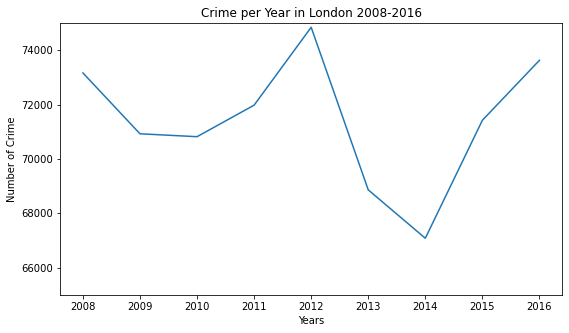

In [124]:
crime_year = dc.groupby(['year'], axis = 0).sum()
crime_year['value'].plot(kind='line', figsize = (9,5))
plt.title('Crime per Year in London 2008-2016')
plt.ylim([65000, 75000])
plt.xlabel('Years')
plt.ylabel('Number of Crime')
plt.show()
#Dari grafik terlihat bahwa angka kriminal di London tertinggi terjadi pada tahun 2012 terjadi 74842 kasus 
#dan paling rendah tahun 2014 terjadi 67081 kasus

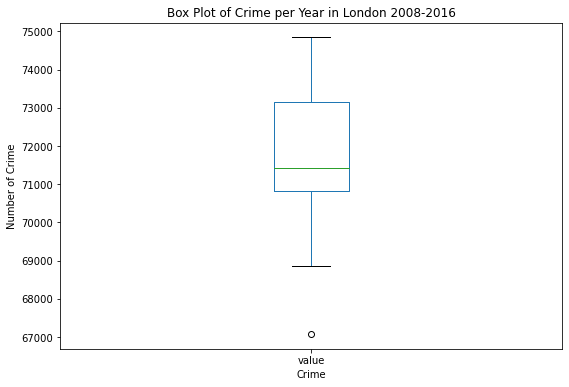

In [55]:
crime_year['value'].plot(kind='box', figsize=(9, 6))
plt.title('Box Plot of Crime per Year in London 2008-2016')
plt.xlabel('Crime')
plt.ylabel('Number of Crime')
plt.show()
#Dari grafik boxplot dapat disimpulkan di London terjadi rata-rata 71413 kasus kriminal per tahun


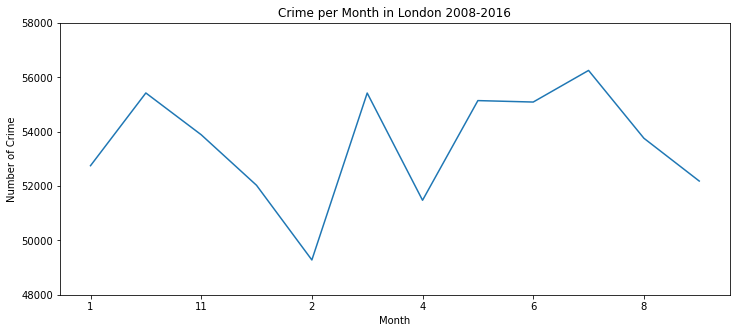

In [40]:
crime_month = dc.groupby(['month'], axis = 0).sum()
crime_month
crime_month['value'].plot(kind='line',figsize = (12,5))
plt.title('Crime per Month in London 2008-2016')
plt.ylim([48000, 58000])
plt.xlabel('Month')
plt.ylabel('Number of Crime')
plt.show()
#Dapat disimpulkan bahwa kasus kriminal cenderung rendah pada bulan Februari

In [41]:
crime_year_month =  dc.groupby(['year','month'], axis = 0).sum()
crime_year_month

value
year month       
2008 1       6595
     10      6298
     11      6006
     12      5945
     2       6269
...           ...
2016 5       6425
     6       6284
     7       6767
     8       6363
     9       6029

[108 rows x 1 columns]

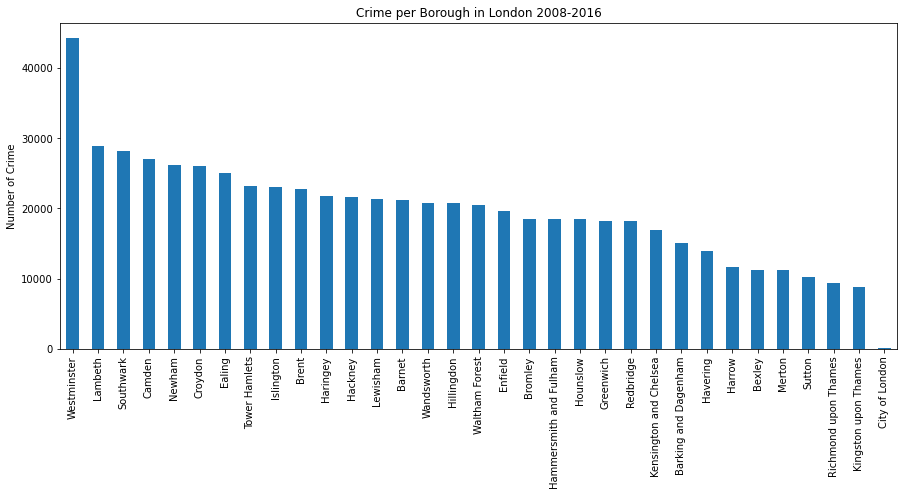

In [42]:
crime_borough = dc.groupby(['borough'], axis = 0).sum()
crime_borough.sort_values(by= 'value', ascending=False, inplace= True)

crime_borough['value'].plot(kind='bar', figsize =(15,6))
plt.xlabel('')
plt.ylabel('Number of Crime')
plt.title('Crime per Borough in London 2008-2016')
plt.show()

#Dapat disimpulkan kasus kriminal tertinggi terjadi di daerah Westminster dan kasus kriminal di kota London sangat rendah

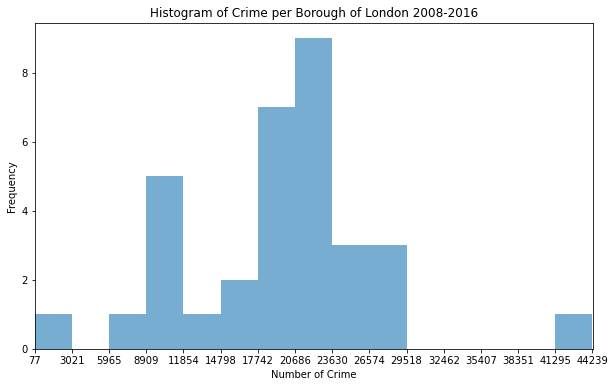

In [43]:
#Histogram of Crime per Borough
count, bin_edges = np.histogram(crime_borough['value'],15)
xmin = bin_edges[0]-10
xmax =bin_edges[-1]+10
crime_borough['value'].plot.hist(figsize=(10,6),
          bins = 15,
          alpha=0.6,
          xticks=bin_edges,
        stacked = True,
         xlim = (xmin,xmax)
     )
plt.title('Histogram of Crime per Borough of London 2008-2016')
plt.xlabel('Number of Crime')
plt.ylabel('Frequency')
plt.show()

#Dapat disimpulkan sebaran kasus kriminal di bagian daerah London tertinggi diangka 20686-23630 mencapai 9 daerah 

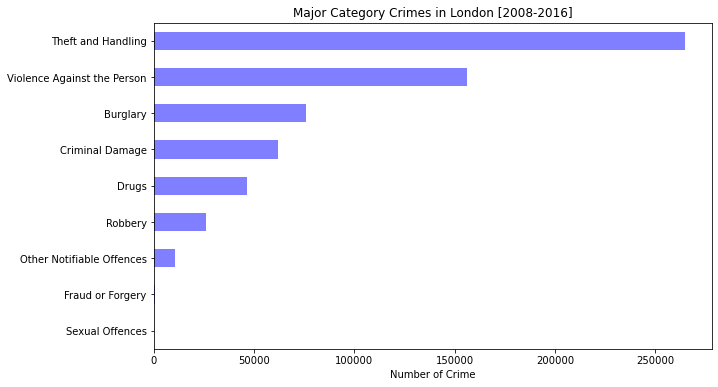

In [44]:
major_crime = dc.groupby(['major_category'], axis = 0).sum()
major_crime.sort_values(by= 'value', ascending=True, inplace= True)

major_crime['value'].plot(kind='barh', figsize=(10, 6), color='blue', alpha=0.5)
plt.ylabel('')
plt.xlabel('Number of Crime')
plt.title('Major Category Crimes in London [2008-2016]')
plt.show()

#Jumlah kriminal tertinggi kategori major di London adalah kasus pencurian, kekerasan dan perampokan

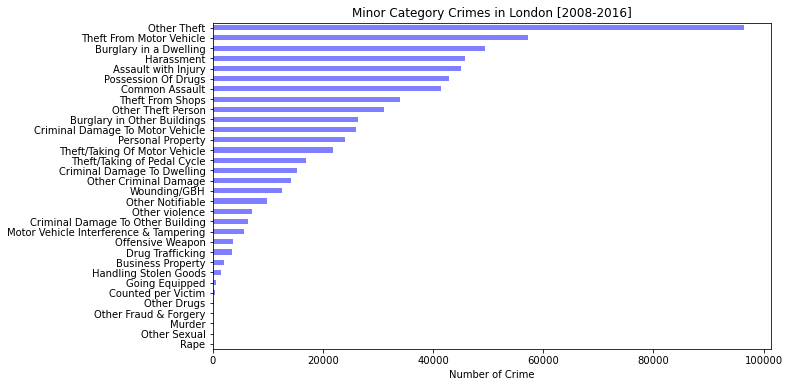

In [45]:
minor_crime = dc.groupby(['minor_category'], axis = 0).sum()
minor_crime.sort_values(by= 'value', ascending=True, inplace= True)
minor_crime['value'].plot(kind='barh', figsize=(10, 6), color='blue', alpha=0.5)
plt.ylabel('')
plt.xlabel('Number of Crime')
plt.title('Minor Category Crimes in London [2008-2016]')
plt.show()

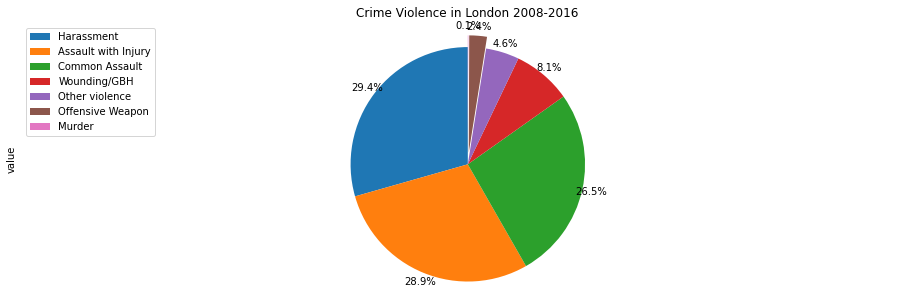

In [46]:
violence = dc[(dc['major_category']== 'Violence Against the Person')]
violence_crime = violence.groupby(['minor_category'],axis=0).sum()
violence_crime.sort_values(by= 'value', ascending=False, inplace= True)
violence_crime['value'].plot(kind ='pie',
                            figsize=(16,5),
                            autopct='%1.1f%%',
                            startangle=90,
                           labels = None,
                             pctdistance=1.08,
                              explode=[0, 0, 0, 0, 0, 0.1,0.1]
                           )
plt.title('Crime Violence in London 2008-2016')
plt.axis('equal')
plt.legend(labels= violence_crime.index , loc= 'upper left')
plt.show()

#Diagram Pie menunjukan minor kategori kekerasaan yang dominan adalah kasus pelecehan dan pemukulan

In [47]:
westminster = dc[dc['borough'] == 'Westminster']
westminster_theft = westminster[westminster['major_category'] == 'Theft and Handling']
westminster_theft


,lsoa_code,borough,major_category,minor_category,value,year,month
83304,E01004665,Westminster,Theft and Handling,Other Theft,1,2008,1
152518,E01004656,Westminster,Theft and Handling,Theft From Motor Vehicle,2,2008,1
156199,E01004689,Westminster,Theft and Handling,Handling Stolen Goods,1,2008,1
178186,E01004681,Westminster,Theft and Handling,Theft From Motor Vehicle,3,2008,1
194582,E01004734,Westminster,Theft and Handling,Other Theft Person,61,2008,1
...,...,...,...,...,...,...,...
1240442,E01004702,Westminster,Theft and Handling,Other Theft,5,2016,9
1280653,E01004744,Westminster,Theft and Handling,Theft From Shops,2,2016,9
1289856,E01004743,Westminster,Theft and Handling,Other Theft Person,1,2016,9
1305905,E01004668,Westminster,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2016,9


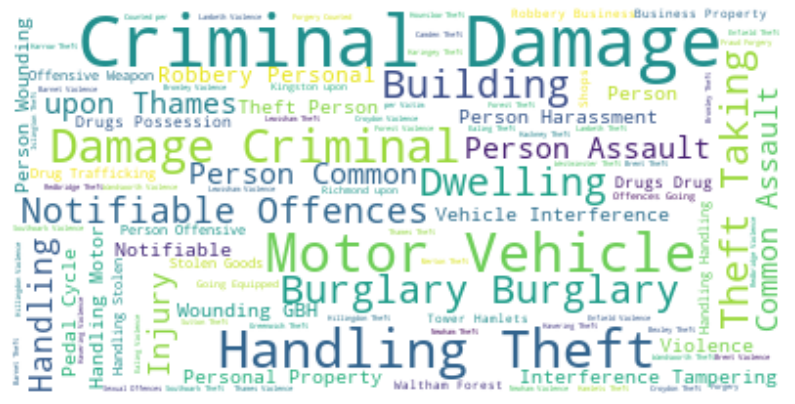

In [48]:
from wordcloud import WordCloud, STOPWORDS
dword = open('crimelondon.txt', 'r').read()

stopwords = set(STOPWORDS)

dword_wc =WordCloud(background_color='white',
            max_words=2000,
            stopwords=stopwords,
                )

dword_wc.generate(dword)

# Visualize most words from 2000

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(dword_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

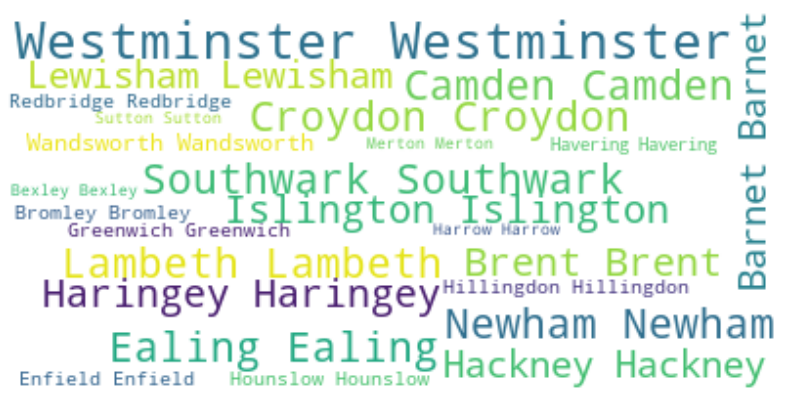

In [49]:
crime_borough.head()
max_words =2000
total =crime_borough['value'].sum()
word_string =''
for borough in crime_borough.index.values:
    if len(borough.split(' ')) == 1:
        repeat_num_times = int(crime_borough.loc[borough,'value']/float(total)*max_words)
        word_string = word_string +((borough+'  '))*repeat_num_times

word_string
wordcloud = WordCloud(background_color='white').generate(word_string)
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 1.0, 'Total Crimes in London 2008-2016')

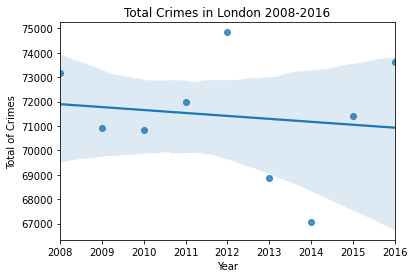

<Figure size 720x648 with 0 Axes>

In [137]:
import seaborn as sns

#crime_year.reset_index(inplace = True)
crime_year['year'] = crime_year['year'].astype(float)
crime_year
ax = sns.regplot(x='year',y ='value', data = crime_year)
plt.figure(figsize=(10,9))
ax.set(xlabel='Year',ylabel='Total of Crimes')
ax.set_title('Total Crimes in London 2008-2016')

In [167]:
import folium

london = folium.Map(location=[51.5, 0], zoom_start=10)
london




In [146]:
#LONDON BOROUGH
#https://skgrange.github.io/www/data/london_boroughs.json  

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [172]:
 import urllib, json
 url = "https://skgrange.github.io/www/data/london_boroughs.json  "
 read_from_url = urllib.some_method_open("https://skgrange.github.io/www/data/london_boroughs.json  ")
>>> my_dict = json.load(read_from_url)
>>> print(my_dict['some_key'])

IndentationError: unexpected indent (<ipython-input-172-d0276b614764>, line 3)